# Project_5: Data Wrangling Project

## Gather

In [2]:
#import numpy, pandas, seaborn, requests, tweepy, json, os, matplotlib, matplotlib inline

import pandas as pd
import numpy as np
import seaborn as snb
import requests
import tweepy
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline
from timeit import default_timer as timer
from IPython.core.display import clear_output

### Twitter_archive_enhanced

In [4]:
# reading twitter-archive-enhanced file using pandas
twitter_archive = pd.read_csv('C:/Users/Okafor Chinelo/Desktop/DAND/Data_Wrangling/Data_Wrangle/twitter-archive-enhanced.csv', sep = ',')


### Image_predictions

In [5]:
# the url to obtain dog images from Udacity server programatically.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# send get request and save file
with open('image_predictions.tsv', mode='wb') as file:
    response = requests.get(url)
    file.write(response.content)
    
# read second file
dog_predictions = pd.read_csv("image_predictions.tsv", sep='\t')


### Tweet_Json

In [ ]:
#create an API object to gather Twitter data
consumer_key = 'secret'
consumer_secret = 'secret'
access_token = 'secret'
access_secret = 'secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

try:
    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
except:
    print("ERROR")


In [ ]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
       for i, tweet_id in enumerate(tweet_ids):
        print(f"{i} : {tweet_id}")
        clear_output(wait = True)
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [13]:
# read tweet_json
data = []
with open('tweet_json.txt') as f:
    for line in f:
       data.append(json.loads(line))

tweep_df = pd.DataFrame(data)

## Assess

In [6]:
# Check the twitter_archive data
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# details of twitter_archive to check for error
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
# statistics details of twitter_archive to check for error
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
#details of dog_predictions to check for error
dog_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
#more details of dog_predictions to check for error
dog_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
#statistics details of dog_predictions to check for error
dog_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
# details of tweep_df to check for error
tweep_df
tweep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2337 non-null object
display_text_range               2337 non-null object
entities                         2337 non-null object
extended_entities                2065 non-null object
favorite_count                   2337 non-null int64
favorited                        2337 non-null bool
full_text                        2337 non-null object
geo                              0 non-null object
id                               2337 non-null int64
id_str                           2337 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [15]:
# statistic details of tweep_df to check for error
tweep_df.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2337.000000,2.337000e+03,7.700000e+01,7.700000e+01,2.600000e+01,2337.00000
mean,7839.500214,7.420692e+17,7.440692e+17,2.040329e+16,8.113972e+17,2876.09371
std,12150.867989,6.824243e+16,7.524295e+16,1.260797e+17,6.295843e+16,4858.70740
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,1.00000
25%,1361.000000,6.783345e+17,6.757073e+17,3.589728e+08,7.761338e+17,580.00000
50%,3419.000000,7.185406e+17,7.032559e+17,4.196984e+09,8.281173e+17,1344.00000
75%,9605.000000,7.986825e+17,8.233264e+17,4.196984e+09,8.637581e+17,3355.00000
max,162044.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,82420.00000


## Twitter_archive

### Quality issues

1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, The variables above data is incomplete, all should be removed.

2.	Filter out outliers in rating_numerator and rating_denominator

### Tidiness Issues


1.	dog stages (doggo, floofer, pupper, and puppo) should be values of a single variable.
2.	Rename rating_denominator to "dog_rating"
3.	Create unique columns from timestamp (Year, month, day, hour).
4.  dog stages (doggo, floofer, pupper, and puppo) merged to a single variable.



## dog_predictions

### Quality issues

1.  Inconsistent dog names in p1, p2, p3 values

2.  p1, p2, and p3 should be converted to title format.

3.  Dog breeds are in both lower and Upper cases, should all start with upper cases.

4.  p1, p2, and p3 should be replaced with space.




## tweep_df

### Quality issues

1. contributors, coordinates, extended_entities, geo, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str,  in_reply_to_user_id, in_reply_to_user_id_str, place, possibly_sensitive, possibly_sensitive_appealable, quoted_status,          quoted_status_id, quoted_status_id_str, quoted_status_permalink, retweeted_status these variables have incomplete data.

2. contributors, coordinates, geo, place, no data available should be removed.

### Tidiness issues

1. id should be renamed tweet_id.

2. Merge df_twitter_archive, df_dog_predictions, and df_tweep values of interest


# Clean

In [16]:
# Making copies
df_twitter_archive = twitter_archive.copy()
df_dog_predictions = dog_predictions.copy()
df_tweep = tweep_df.copy()

### Code

In [17]:

# delete in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, 
# retweeted_status_timestamp columns in ratings_clean
df_twitter_archive.drop(['in_reply_to_status_id','in_reply_to_user_id',
                    'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],inplace=True,axis=1)

### Test

In [18]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [19]:
#Filter out outliers in rating_numerator, first lets get the max rating.

df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Code

In [20]:
# rating 15 appears to be the maximum rating and others are seen as outliers
df_twitter_archive = df_twitter_archive[df_twitter_archive['rating_numerator'] <= 15]

### Test

In [21]:
df_twitter_archive.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
1       9
2       9
15      2
0       2
Name: rating_numerator, dtype: int64

### Code

In [22]:
#dog stages (doggo, floofer, pupper, and puppo) merged to a single variable.
df_twitter_archive['dog_stage'] = df_twitter_archive[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)


### Test

In [23]:
#check if dog_stage names
df_twitter_archive['dog_stage'].value_counts()

NoneNoneNoneNone        1951
NoneNonepupperNone       244
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

### Code

In [24]:
# clean up the merged dog stage
df_twitter_archive['dog_stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_twitter_archive['dog_stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_twitter_archive['dog_stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_twitter_archive['dog_stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
df_twitter_archive['dog_stage'].replace("NoneNoneNoneNone","None ", inplace=True) 
df_twitter_archive['dog_stage'].replace("doggoNonepupperNone","doggo", inplace=True)
df_twitter_archive['dog_stage'].replace("doggoflooferNoneNone","floofer", inplace=True)
df_twitter_archive['dog_stage'].replace("doggoNoneNonepuppo","puppo", inplace=True)

In [25]:
# drop the doggo, floofer, pupper, puppo columns
df_twitter_archive.drop(['doggo', 'floofer','pupper','puppo'],inplace=True,axis=1)

### Test

In [43]:
df_twitter_archive.dog_stage.unique()

array(['None ', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### Test

In [27]:
df_twitter_archive['dog_stage'].value_counts()

None       1951
pupper      244
doggo        95
puppo        30
floofer      10
Name: dog_stage, dtype: int64

### Code

In [28]:
# rename rating_numerator to dog_rating)
df_twitter_archive.rename(columns={'rating_numerator':'dog_rating'}, inplace=True)

### Test

In [29]:

df_twitter_archive.head(3)

,tweet_id,timestamp,source,text,expanded_urls,dog_rating,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None


### Code

In [30]:
# convert timestamp in df_twitter_archive to datetime
df_twitter_archive['timestamp']= pd.to_datetime(df_twitter_archive['timestamp'])

In [31]:
df_twitter_archive['year'] = df_twitter_archive['timestamp'].dt.year
df_twitter_archive['month'] = df_twitter_archive['timestamp'].dt.month
df_twitter_archive['day'] = df_twitter_archive['timestamp'].dt.day
df_twitter_archive['hour'] = df_twitter_archive['timestamp'].dt.hour

### Test

In [32]:
# check if time stamp is corrected
df_twitter_archive.head(3)

,tweet_id,timestamp,source,text,expanded_urls,dog_rating,rating_denominator,name,dog_stage,year,month,day,hour
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,2017,8,1,16
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,2017,8,1,0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,2017,7,31,0


### Code

In [33]:
# rename id to tweet_id
df_tweep.rename(columns={'id':'tweet_id'}, inplace=True)

### Test

In [34]:
# check if renamed
df_dog_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Merge df_twitter_archive, df_dog_predictions, and df_tweep values of interest

In [35]:
# Merge df_twitter_archive, df_dog_predictions, and df_tweep values of interest
archive_interest = ['tweet_id', 'dog_rating', 'rating_denominator',
               'name', 'year', 'month', 'day', 'hour', 'dog_stage', 'source']
df_twitter = df_twitter_archive[archive_interest]

df_tweep  = df_tweep [['tweet_id', 'favorite_count', 'retweet_count']]

df_dog_predictions = df_dog_predictions.drop(['jpg_url', 'img_num'], axis = 1)

# merge dataframes
df = df_twitter.merge(df_dog_predictions,on='tweet_id').merge(df_tweep,on='tweet_id')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2045
Data columns (total 21 columns):
tweet_id              2046 non-null int64
dog_rating            2046 non-null int64
rating_denominator    2046 non-null int64
name                  2046 non-null object
year                  2046 non-null int64
month                 2046 non-null int64
day                   2046 non-null int64
hour                  2046 non-null int64
dog_stage             2046 non-null object
source                2046 non-null object
p1                    2046 non-null object
p1_conf               2046 non-null float64
p1_dog                2046 non-null bool
p2                    2046 non-null object
p2_conf               2046 non-null float64
p2_dog                2046 non-null bool
p3                    2046 non-null object
p3_conf               2046 non-null float64
p3_dog                2046 non-null bool
favorite_count        2046 non-null int64
retweet_count         2046 non-null int64
dt

## Data Analysis and Visualization

In [37]:
# summary
df.describe()

,tweet_id,dog_rating,rating_denominator,year,month,day,hour,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,2.046000e+03,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2.046000e+03,2.046000e+03,2046.000000,2046.000000
mean,7.381567e+17,10.581134,10.001955,2015.862659,7.174976,15.965298,9.690127,0.594248,1.351400e-01,6.034473e-02,8299.076735,2760.619746
std,6.776683e+16,2.188884,0.284903,0.699426,4.112796,8.920034,8.629611,0.271108,1.008176e-01,5.087163e-02,12527.049154,4819.597063
min,6.660209e+17,0.000000,2.000000,2015.000000,1.000000,1.000000,0.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,11.000000
25%,6.762241e+17,10.000000,10.000000,2015.000000,3.000000,8.000000,1.000000,0.363261,5.415523e-02,1.619283e-02,1565.250000,586.000000
50%,7.117137e+17,11.000000,10.000000,2016.000000,7.000000,16.000000,4.000000,0.588030,1.192560e-01,4.933745e-02,3649.500000,1295.500000
75%,7.931619e+17,12.000000,10.000000,2016.000000,11.000000,24.000000,18.000000,0.843689,1.963873e-01,9.218437e-02,10396.000000,3182.500000
max,8.924206e+17,15.000000,20.000000,2017.000000,12.000000,31.000000,23.000000,1.000000,4.880140e-01,2.710420e-01,162044.000000,82420.000000


### Highest Dog Rating

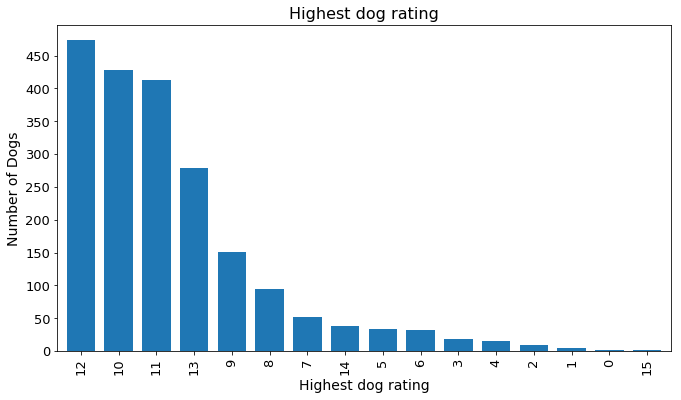

In [38]:
#plotting a graph of highest dog rating
fig = plt.figure(1, figsize=(11, 6))
df.dog_rating.value_counts().plot.bar(width=0.76)
plt.xlabel('Highest dog rating', fontsize=14)
plt.ylabel('Number of Dogs', fontsize=14)
plt.title('Highest dog rating', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.yticks(range(0, 500, 50));

Highest dog rating is 12.

### Highest dog stage

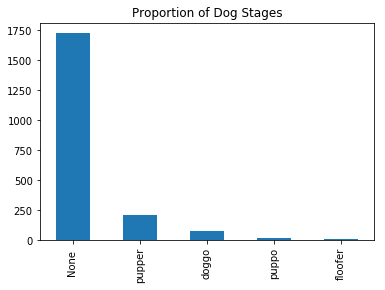

In [39]:
# plots of highest dog stage
df['dog_stage'].value_counts().plot(kind="bar")
plt.title('Proportion of Dog Stages');

From the chat, most of the rating do not specify the dog stages.

### plot of the devices mostly used by users

Text(0,0.5,'Frequency')

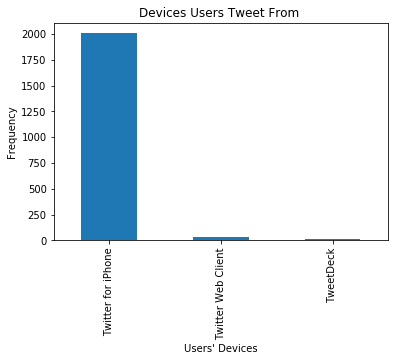

In [40]:
# plot of the devices mostly used by users
df['category'] = df['source'].str.split(">").str[1].str.slice(0,-3).value_counts().plot(kind="bar")
plt.title('Devices Users Tweet From ')
plt.xlabel('Users\' Devices')
plt.ylabel('Frequency')

It is seen from the chart above that tweets emanates more from Iphone users. Which is more of the mobile users.

### Correlation between retweets and favorites

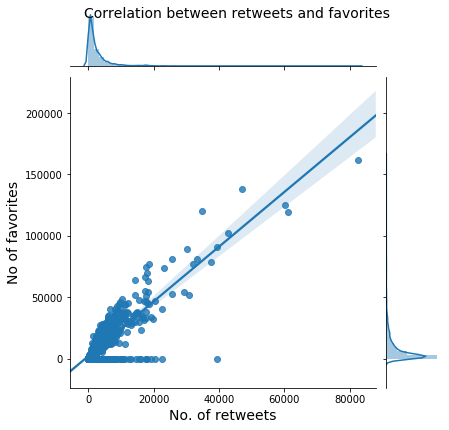

In [41]:
snb.jointplot(x="retweet_count", y="favorite_count",
              data = df[["retweet_count", "favorite_count"]],kind='reg')
plt.suptitle('Correlation between retweets and favorites', fontsize=14)
plt.xlabel('No. of retweets', fontsize=14)
plt.ylabel('No of favorites', fontsize=14);

From the above plot, favorites and retweets have a strongly positive correlation. This is expected since retweets exposes the ratings to more viewers, hence, increasing the number of favorites. 

In [42]:
#save file
df.to_csv('twitter_archive_master.csv', index=False)

# Summary

From the analysis and Visualization done it is seen that mobile users, especially Iphone users tweet more than any other device, it is also seen that the highest dog rate is 12 and the favourites and retweets has strong correlation.